# Agents with Conditional Edges

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [9]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    result: int

In [10]:
def adder_node(state: AgentState) -> AgentState:
    """Add two numbers."""
    state['result'] = state['number1'] + state['number2']
    return state

def subtractor_node(state: AgentState) -> AgentState:
    """Subtract two numbers."""
    state['result'] = state['number1'] - state['number2']
    return state

def decision_fcn(state: AgentState) -> str:
    """Route to the appropriate operation based on the operation type."""
    if state['operation'] == 'add':
        return '+'
    elif state['operation'] == 'subtract':
        return '-'
    else:
        raise ValueError(f"Unknown operation: {state['operation']}")

In [11]:
graph = StateGraph(AgentState)
graph.add_node("adder", adder_node)
graph.add_node("subtractor", subtractor_node)
graph.add_node("router", action= lambda state:state)

from langgraph.graph import START, END
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
     decision_fcn, 
    {
        "+": "adder",
        "-": "subtractor",
    }
)
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)
app = graph.compile()

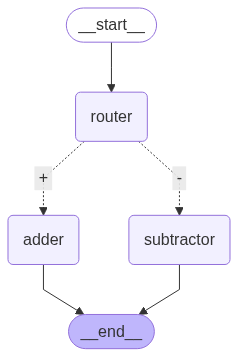

In [13]:
from IPython.core.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
initial_state = AgentState(number1=5,number2=3,operation='add',result=0)
result = app.invoke(initial_state)
print(f"Result of {initial_state['operation']} operation: {result['result']}")

Result of add operation: 8
